# K-Means

In [42]:
# K-Means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [43]:
# 데이터 생성
# make_blobs : 군집화에 필요한 데이터 생성
n_samples = 300
n_clusters = 4
x, y = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.6, 
                  random_state=42)

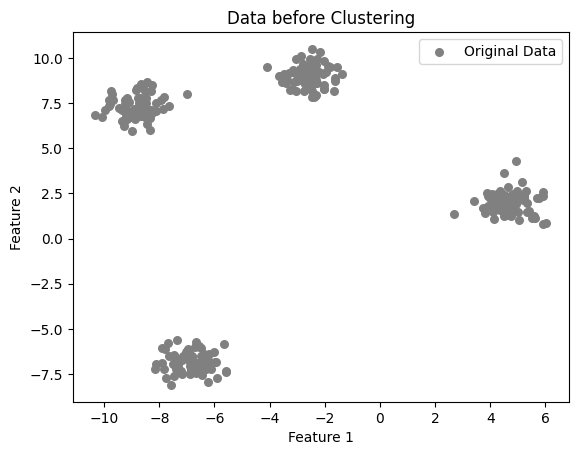

In [44]:
# 데이터 시각화 (군집화 전)
plt.scatter(x[:, 0], x[:, 1], s=30, c='gray', label="Original Data")
plt.title('Data before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [45]:
# KMeans 객체생성 학습
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [46]:
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(x)

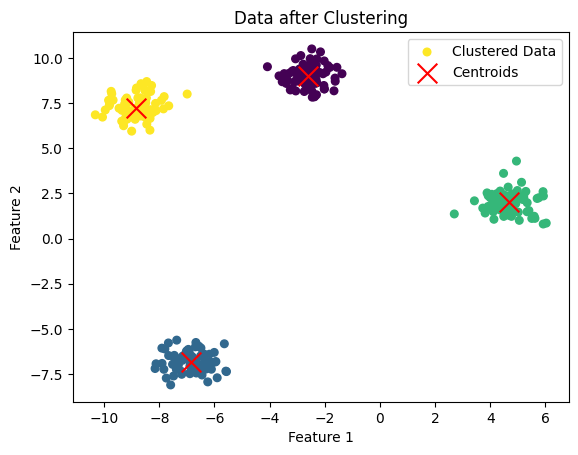

In [47]:
# 군집 결과 시각화
plt.scatter(x[:,0], x[:,1], c=cluster_labels, cmap='viridis',
             s=30, label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
             s=200, c='red', label='Centroids', marker='x')
plt.title('Data after Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [48]:
# 최적의 K 값 찾기 (엘보우 방법)
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(x)
    wcss.append(kmeans_temp.inertia_)

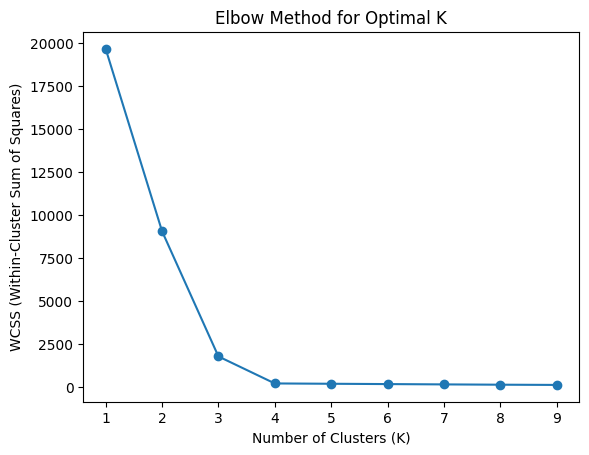

In [49]:
# 엘보우 그래프
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
# 실루엣 스코어
sil_avg = silhouette_score(x, cluster_labels)
print(sil_avg)

0.8756469540734731


In [52]:
# 시각화를 위한 점수계산
sil_values = silhouette_samples(x, cluster_labels)

C:\Users\user\AppData\Local\Temp\ipykernel_13672\796750286.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


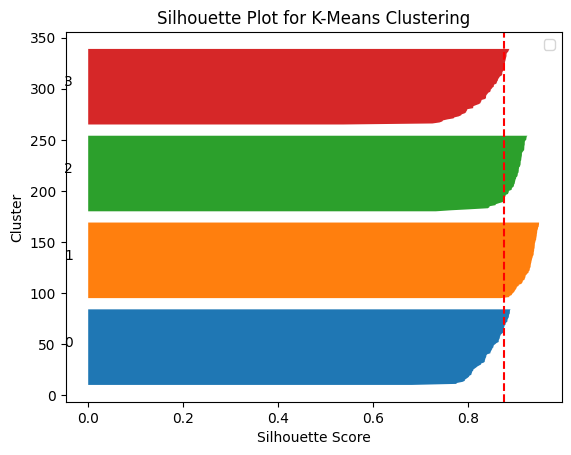

In [53]:
y_lower = 10
for i in range(4):
    ith_cluster_sil_values = sil_values[cluster_labels == i]
    ith_cluster_sil_values.sort()
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0,
                     ith_cluster_sil_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 # 다음 클러스터 이동

plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.title('Silhouette Plot for K-Means Clustering')
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster')
plt.legend()
plt.show()

In [1]:
# 계층적 군집화
# 필요한 라이브러리 임포트
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 생성
# - 군집화 실험에 적합한 샘플 데이터를 생성합니다.
# - make_blobs: 클러스터가 명확히 구분되는 데이터셋 생성
data, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.7,
random_state=42)

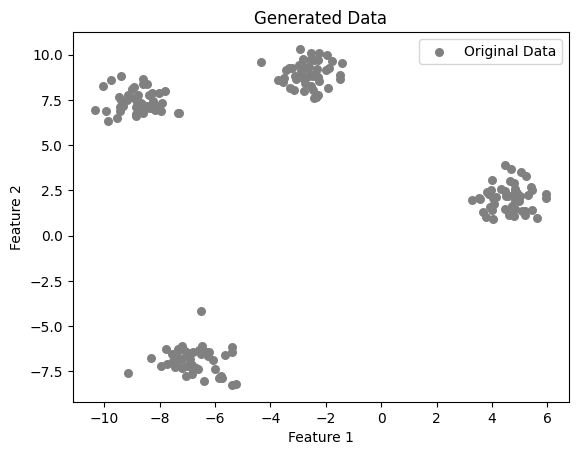

In [4]:
# 데이터 시각화 (원본 데이터)
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="Original Data")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [5]:
# 2. 계층적 군집화 적용
# - linkage 함수를 사용하여 클러스터 간의 거리 계산
# - method='ward': Ward's method로 데이터 간 거리 기반 병합
linked = linkage(data, method='ward')

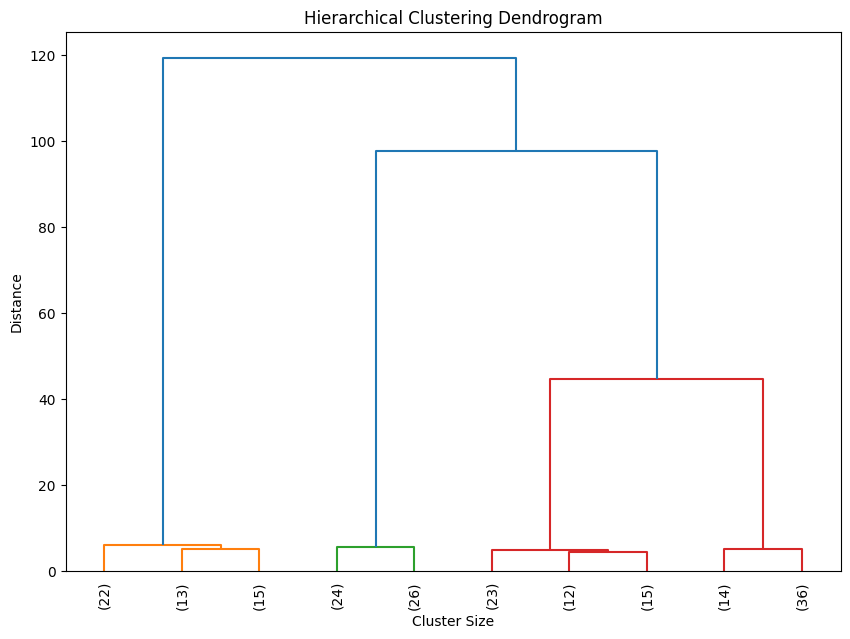

In [6]:
# 3. 덴드로그램 시각화
# - linkage 결과를 기반으로 덴드로그램을 생성합니다.
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90,
leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [7]:
# 4. 클러스터 형성
# - fcluster: 덴드로그램의 특정 거리 기준으로 클러스터를 형성
# - t=7: 클러스터를 나누는 임계값 (거리 기준)
cluster_labels = fcluster(linked, t=7, criterion='distance')

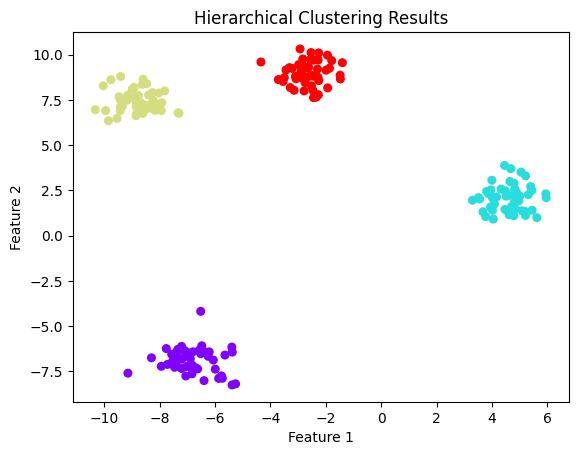

In [8]:
# 5. 결과 시각화
# - 각 클러스터를 색상으로 구분하여 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=30)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [20]:
# DBSCAN 예제
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [21]:
# 1. 데이터 생성
# - make_moons: 비구형(non-linear) 데이터 구조를 가진 샘플 데이터를 생성
# - noise=0.05: 데이터에 노이즈 추가
data, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

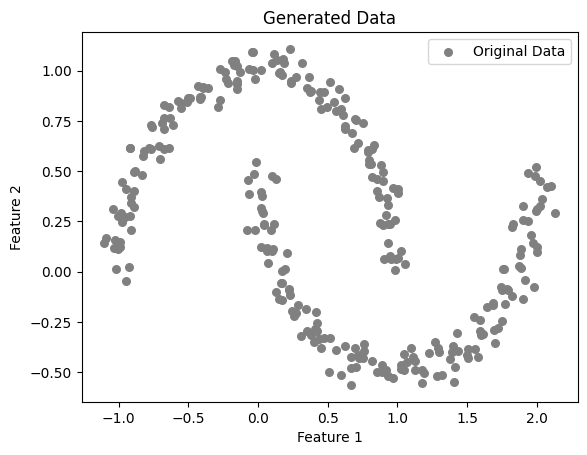

In [22]:
# 데이터 시각화 (원본 데이터)
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="Original Data")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [23]:
# 2. DBSCAN 모델 생성 및 학습
# - eps: 포인트 간 거리가 이 값 이하일 때 이웃으로 간주 (밀도의 기준)
# - min_samples: 핵심 포인트가 되기 위한 최소 이웃 데이터 수
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [24]:
# 데이터에 대한 클러스터 예측
cluster_labels = dbscan.fit_predict(data)

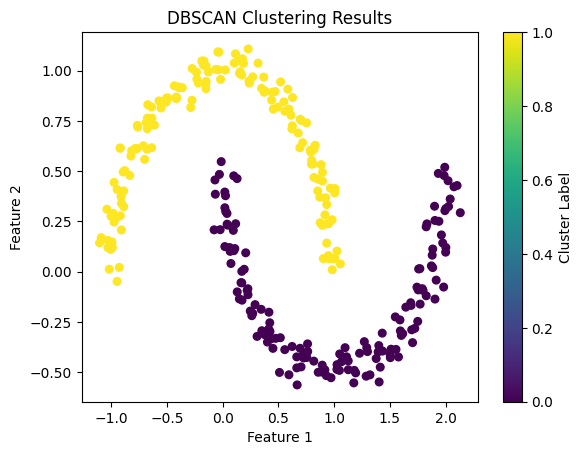

In [25]:
# 3. 클러스터링 결과 분석
# 클러스터링 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [26]:
# 4. 클러스터링 결과 요약
# - 클러스터 레이블: 클러스터 번호 (노이즈는 -1로 표시)
unique_labels = set(cluster_labels)
print(f"Unique Clusters: {unique_labels}")

Unique Clusters: {np.int64(0), np.int64(1)}


In [27]:
# 클러스터별 데이터 포인트 수 출력
for label in unique_labels:
    count = (cluster_labels == label).sum()
    if label == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {label}: {count} points")

Cluster 0: 150 points
Cluster 1: 150 points
